# YOLOv3 Clothing item detection

For more details refer : https://github.com/kritanjalijain/Clothing_Detection_YOLO

## Import and Preparation 

In [2]:
! ls

MyDrive  sample_data


In [3]:
!mkdir output

In [4]:
! git clone https://github.com/kritanjalijain/Clothing_Detection_YOLO.git

Cloning into 'Clothing_Detection_YOLO'...
remote: Enumerating objects: 285, done.
remote: Counting objects: 100% (204/204), done.
remote: Compressing objects: 100% (177/177), done.
remote: Total 285 (delta 39), reused 169 (delta 23), pack-reused 81
Receiving objects: 100% (285/285), 9.91 MiB | 41.06 MiB/s, done.
Resolving deltas: 100% (39/39), done.


In [5]:
%cd Clothing_Detection_YOLO

/content/Clothing_Detection_YOLO


In [6]:
! git pull

Already up to date.


In [7]:
%cd yolo/weights

/content/Clothing_Detection_YOLO/yolo/weights


In [8]:
!gdown --id 1BaWJ6j5HGC136h6f4kl_eo2LNPfjgyjq

Downloading...
From: https://drive.google.com/uc?id=1BaWJ6j5HGC136h6f4kl_eo2LNPfjgyjq
To: /content/Clothing_Detection_YOLO/yolo/weights/yolov3-modanet_last.weights
100% 247M/247M [00:05<00:00, 49.0MB/s]


In [9]:
%cd ..

/content/Clothing_Detection_YOLO/yolo


In [10]:
%cd ..

/content/Clothing_Detection_YOLO


In [11]:
! ls

extraction_bb.py  new_image_demo.py  predictors  rename.py	   tests
extract_top.py	  output	     README.md	 requirements.txt  yolo


In [1]:
from google.colab import drive
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


## Detect, Crop and Save items category-wise

In [12]:
import torch
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
#from yolo.utils.utils import *
from predictors.YOLOv3 import YOLOv3Predictor

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.cuda.empty_cache()
print(device)

#YOLO PARAMS
yolo_modanet_params = {   "model_def" : "yolo/modanetcfg/yolov3-modanet.cfg",
"weights_path" : "yolo/weights/yolov3-modanet_last.weights",
"class_path":"yolo/modanetcfg/modanet.names",
"conf_thres" : 0.5,
"nms_thres" :0.4,
"img_size" : 416,
"device" : device}
#DATASET
dataset = 'modanet' 
yolo_params = yolo_modanet_params

#Classes
def load_classes(path):
    """
    Loads class labels at 'path'
    """
    fp = open(path, "r")
    names = fp.read().split("\n")
    return names
classes = load_classes(yolo_params["class_path"])

#Colors
cmap = plt.get_cmap("rainbow")
colors = np.array([cmap(i) for i in np.linspace(0, 1, 13)])
#np.random.shuffle(colors)
model = 'yolo' 
detectron = YOLOv3Predictor(params=yolo_params)
folder = "/content/MyDrive/MyDrive/multicategory/models" #input('input image directory')
parent_dir = '/content/output'
images=[]
detections = []

    #path = input('img path: ')
    #if not os.path.exists(path):
    #    print('Img does not exists..')
    #    break#continue
for filename in os.listdir(folder):
    path = os.path.join(folder,filename)
    #print(path)
    img = cv2.imread(path)
    if img is not None:
        images.append(img)
        #print('image appended')
    detections = detectron.get_detections(img)
    #print(detections)
    #print(type(detections))
    #print(type(images))
    count = 1


    if len(detections) != 0 :
        detections.sort(reverse=False ,key = lambda x:x[4])
        img_id = path.split('/')[-1].split('.')[0]
        print(img_id)
        for x1, y1, x2, y2, cls_conf, cls_pred in detections:


                print("\t+ Label: %s, Conf: %.5f" % (classes[int(cls_pred)], cls_conf))            
                color = colors[int(cls_pred)]
                
                color = tuple(c*255 for c in color)
                color = (.7*color[2],.7*color[1],.7*color[0])       
                    
                font = cv2.FONT_HERSHEY_SIMPLEX   
            
            
                x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
                text =  "%s conf: %.3f" % (classes[int(cls_pred)] ,cls_conf)
                
                
                
                #print(img)
                #print(y1, y2, x1, x2)
                img_crop = img[y1:y2, x1:x2]
                #print(img_crop)

                if classes[int(cls_pred)] in ['boots' , 'footwear']:
                   
                    directory = 'footwear'#str(classes[int(cls_pred)])
                    shoe_dir_path = os.path.join(parent_dir, directory)
                    try: 
                        os.mkdir(shoe_dir_path) 
                    except OSError as error: 
                        print("directory exists")
                    crop_path = shoe_dir_path + "/" + str(img_id) + str(classes[int(cls_pred)])+str(count)+ '.png' 
                    count = count+1

                elif classes[int(cls_pred)] in ['pants', 'shorts','skirt' ]:
                    
                    directory = 'bottomwear'#str(classes[int(cls_pred)])
                    bottom_dir_path = os.path.join(parent_dir, directory)
                    try: 
                        os.mkdir(bottom_dir_path) 
                    except OSError as error: 
                        print("directory exists")
                    crop_path = bottom_dir_path + "/" + str(img_id) + str(classes[int(cls_pred)])+ '.png' 
                    #crop_path = "output/cropped/bottomwear/" + str(img_id) + str(classes[int(cls_pred)])+ '.jpg' 

                elif classes[int(cls_pred)] in ['top', 'outer']:
                    
                    directory = 'topwear'#str(classes[int(cls_pred)])
                    top_dir_path = os.path.join(parent_dir, directory)
                    try: 
                        os.mkdir(top_dir_path) 
                    except OSError as error: 
                        print("directory exists")
                    crop_path = top_dir_path + "/" + str(img_id) + str(classes[int(cls_pred)])+ '.png' 
                    #crop_path = "output/cropped/upper/" + str(img_id) + str(classes[int(cls_pred)])+ '.jpg' 
                
                else:
                    
                    directory = str(classes[int(cls_pred)])
                    new_dir_path = os.path.join(parent_dir, directory) 
                    try: 
                        os.mkdir(new_dir_path) 
                    except OSError as error: 
                        print("directory exists")
                    crop_path = new_dir_path + "/" + str(img_id) + str(classes[int(cls_pred)])+ '.png' 
                if((x1 > 0) & (x2 > 0) & (y1 > 0) & (y2 > 0)):
                    cv2.imwrite(crop_path,img_crop)
                cv2.rectangle(img.copy(),(x1,y1) , (x2,y2) , color,3)
                y1 = 0 if y1<0 else y1
                y1_rect = y1-25
                y1_text = y1-5

                if y1_rect<0:
                    y1_rect = y1+27
                    y1_text = y1+20
                    #break
                

        print('Output saved')        
        print('End inner loop')
        #break
    #print("end of if loop")
print("End of while loop")

    
    


cuda
Model loaded successfully from yolo/weights/yolov3-modanet_last.weights.
dress33
	+ Label: dress, Conf: 0.99591
Output saved
End inner loop
dress3
	+ Label: outer, Conf: 0.78881
	+ Label: dress, Conf: 0.93329
directory exists
Output saved
End inner loop
dress26
	+ Label: dress, Conf: 0.97487
directory exists
Output saved
End inner loop
dress27
	+ Label: dress, Conf: 0.85862
directory exists
Output saved
End inner loop
dress17
	+ Label: top, Conf: 0.80083
directory exists
	+ Label: dress, Conf: 0.98540
directory exists
Output saved
End inner loop
bag3
	+ Label: neckwear, Conf: 0.94337
Output saved
End inner loop
dress29
	+ Label: outer, Conf: 0.51927
directory exists
Output saved
End inner loop
dress32
	+ Label: dress, Conf: 0.97791
directory exists
Output saved
End inner loop
dress15
	+ Label: dress, Conf: 0.55183
directory exists
Output saved
End inner loop
dress18
	+ Label: dress, Conf: 0.97685
directory exists
Output saved
End inner loop
dress22
	+ Label: outer, Conf: 0.88893
d

In [ ]:
#zipping output folder to save 
!zip -r /content/output.zip /content/output

  adding: content/output/ (stored 0%)
  adding: content/output/bag/ (stored 0%)
  adding: content/output/bag/bag1bag.png (deflated 0%)
  adding: content/output/bottomwear/ (stored 0%)
  adding: content/output/bottomwear/k1skirt.png (stored 0%)
  adding: content/output/neckwear/ (stored 0%)
  adding: content/output/topwear/ (stored 0%)
  adding: content/output/topwear/k9top.png (deflated 3%)
  adding: content/output/topwear/k1top.png (deflated 0%)
  adding: content/output/topwear/k4outer.png (deflated 5%)
  adding: content/output/topwear/k7top.png (deflated 3%)
  adding: content/output/topwear/dress10outer.png (deflated 2%)
  adding: content/output/topwear/k8top.png (deflated 2%)
  adding: content/output/belt/ (stored 0%)
  adding: content/output/belt/dress4belt.png (deflated 2%)
  adding: content/output/belt/dress10belt.png (deflated 2%)
  adding: content/output/belt/dress7belt.png (stored 0%)
  adding: content/output/dress/ (stored 0%)
  adding: content/output/dress/dress34dress.png (

## Visualise results

cuda
Model loaded successfully from yolo/weights/yolov3-modanet_last.weights.
img path: /content/MyDrive/MyDrive/multicategory/File_019.jpeg
	+ Label: footwear, Conf: 0.73147
	+ Label: shorts, Conf: 0.99357
	+ Label: top, Conf: 0.99953


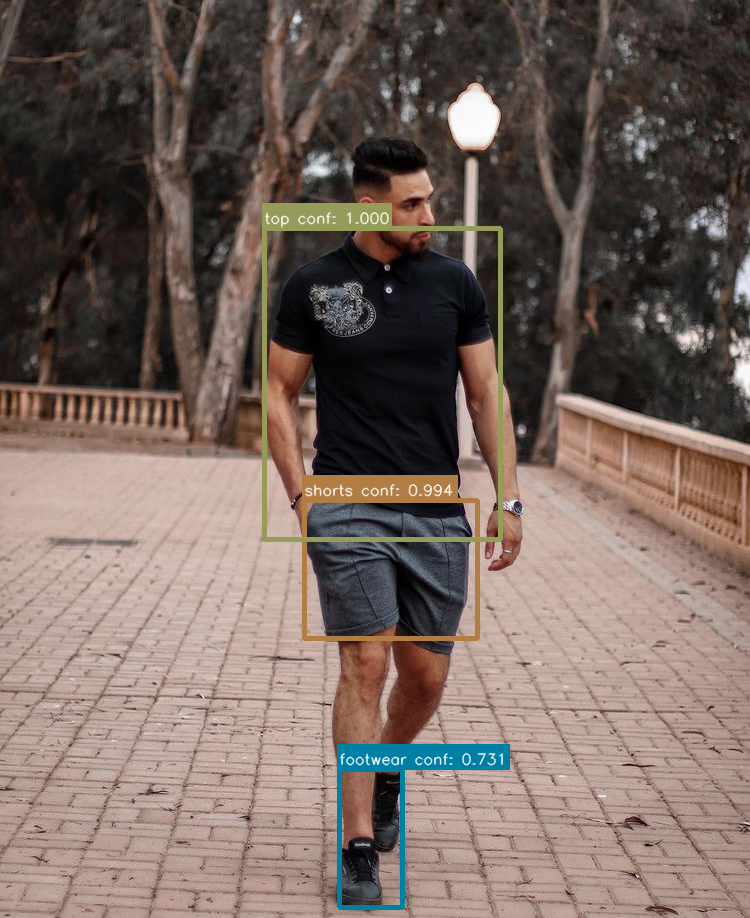

End inner loop
End of while loop


In [21]:
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
import torch
import os
import cv2
from yolo.utils.utils import *
from predictors.YOLOv3 import YOLOv3Predictor
import glob
from tqdm import tqdm
import sys
import uuid


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.cuda.empty_cache()
print(device)

#YOLO PARAMS

yolo_modanet_params = {   "model_def" : "yolo/modanetcfg/yolov3-modanet.cfg",
"weights_path" : "yolo/weights/yolov3-modanet_last.weights",
"class_path":"yolo/modanetcfg/modanet.names",
"conf_thres" : 0.5,
"nms_thres" :0.4,
"img_size" : 416,
"device" : device}


#DATASET
dataset = 'modanet' #'df2' 

yolo_params = yolo_modanet_params


#Classes
classes = load_classes(yolo_params["class_path"])

#Colors
cmap = plt.get_cmap("rainbow")
colors = np.array([cmap(i) for i in np.linspace(0, 1, 13)])
#np.random.shuffle(colors)


model = 'yolo' 
detectron = YOLOv3Predictor(params=yolo_params)


while(True):
    path = input('img path: ')
    if not os.path.exists(path):
        print('Img does not exists..')
        continue
    img = cv2.imread(path)
    detections = detectron.get_detections(img)
    #detections = yolo.get_detections(img)
    #print(detections)
    
    if len(detections) != 0 :
        detections.sort(reverse=False ,key = lambda x:x[4])
        for x1, y1, x2, y2, cls_conf, cls_pred in detections:

                print("\t+ Label: %s, Conf: %.5f" % (classes[int(cls_pred)], cls_conf))           

                #color = bbox_colors[np.where(unique_labels == cls_pred)[0]][0]
                color = colors[int(cls_pred)]
                
                color = tuple(c*255 for c in color)
                color = (.7*color[2],.7*color[1],.7*color[0])       
                    
                font = cv2.FONT_HERSHEY_SIMPLEX   
            
            
                x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
                text =  "%s conf: %.3f" % (classes[int(cls_pred)] ,cls_conf)
                
                cv2.rectangle(img,(x1,y1) , (x2,y2) , color,3)
                y1 = 0 if y1<0 else y1
                y1_rect = y1-25
                y1_text = y1-5

                if y1_rect<0:
                    y1_rect = y1+27
                    y1_text = y1+20
                cv2.rectangle(img,(x1-2,y1_rect) , (x1 + int(8.5*len(text)),y1) , color,-1)
                cv2.putText(img,text,(x1,y1_text), font, 0.5,(255,255,255),1,cv2.LINE_AA)
                
                          
    
    img_id = path.split('/')[-1].split('.')[0]
    cv2_imshow(img)
    print('End inner loop')
    break
print("End of while loop")


    
